<h1 style="font-size:2.0rem; color:green;">  Topography with 90m spatial resolution </h1>  

In [14]:
# Required libraries 
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy     
import numpy as np
from cartopy.feature import NaturalEarthFeature
import cartopy.crs as ccrs 
import cartopy.feature as cf
from cartopy.util import add_cyclic_point
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [39]:
path = r'C:\Data\topo_atlas'
topo = xr.open_dataset(path+'/output_COP90.nc').load()
output_path = r'C:\Users\Hamid\Desktop\results'

In [40]:
topo

<xarray.Dataset>
Dimensions:                        (band: 1, y: 6000, x: 9600)
Coordinates:
  * band                           (band) int32 1
  * y                              (y) float64 35.0 35.0 35.0 ... 30.0 30.0 30.0
  * x                              (x) float64 -10.0 -9.999 ... -2.001 -2.0
Data variables:
    __xarray_dataarray_variable__  (band, y, x) float32 0.0 0.0 ... 493.8 493.8

In [41]:
topo = topo.rename({'__xarray_dataarray_variable__':'topo (m)', 'y':'lat','x':'lon'})

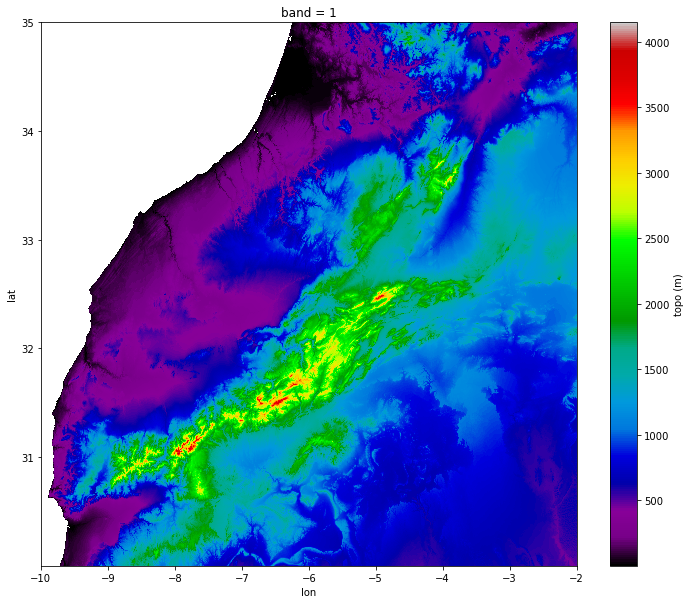

In [6]:
topo['topo (m)'].where(topo['topo (m)']>0).plot(cmap='nipy_spectral', figsize=(12,10))

In [42]:
topo = topo.drop('band')

In [64]:
topo.to_netcdf(path + '/topo_astr_90m.nc')

<h1 style="font-size:1.5rem; color:green;">  Topography 1200m line contour </h1>  

In [11]:
# This auxiliary function will help us in the formatting of the figures
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

<xarray.DataArray 'topo (m)' (lat: 6000, lon: 9600)>
array([[      nan,       nan,       nan, ..., 153.17633, 148.19548,
        143.965  ],
       [      nan,       nan,       nan, ..., 164.82884, 159.5488 ,
        154.6503 ],
       [      nan,       nan,       nan, ..., 170.99399, 165.00943,
        160.9205 ],
       ...,
       [      nan,       nan,       nan, ..., 484.953  , 485.0696 ,
        485.0696 ],
       [      nan,       nan,       nan, ..., 478.5344 , 480.16528,
        480.16528],
       [      nan,       nan,       nan, ..., 485.79712, 493.78152,
        493.78152]], dtype=float32)
Coordinates:
  * lat      (lat) float64 35.0 35.0 35.0 35.0 35.0 ... 30.0 30.0 30.0 30.0 30.0
  * lon      (lon) float64 -10.0 -9.999 -9.998 -9.997 ... -2.002 -2.001 -2.0
Attributes:
    transform:      [ 8.33333333e-04  0.00000000e+00 -1.00000000e+01  0.00000...
    crs:            +init=epsg:4326
    res:            [0.00083333 0.00083333]
    is_tiled:       1
    nodatavals:     nan
    scales:         1.0
    offsets:        0.0
    AREA_OR_POINT:  Area

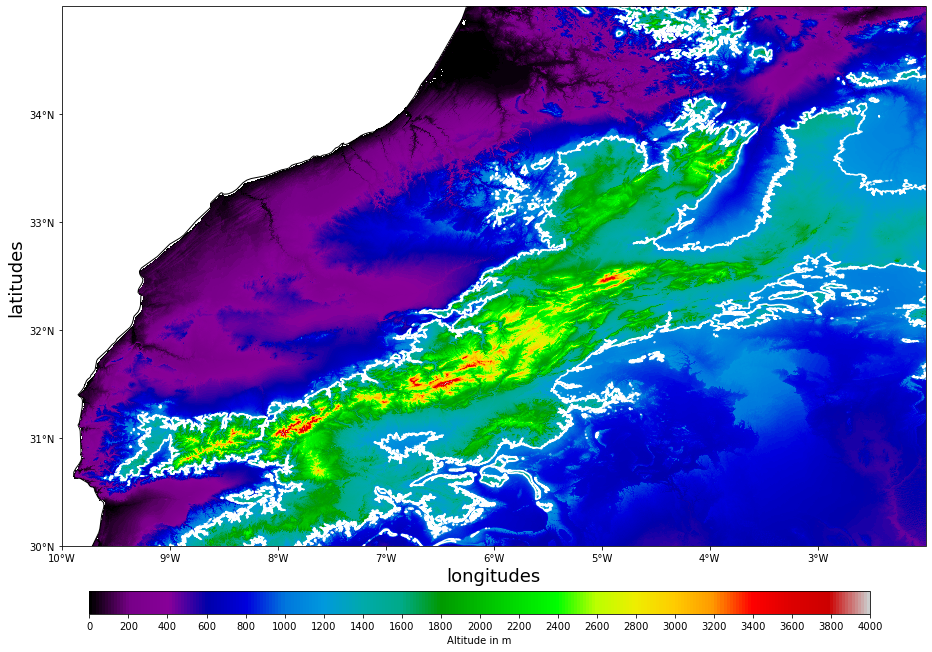

In [46]:
# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()}) #   figsize=(11,8.5)
plt.subplots_adjust(wspace=0.17,hspace=0.2)
set_size(12,8) 

alt = topo['topo (m)'].where(topo['topo (m)']>0).plot(ax=axs, cmap='nipy_spectral', add_colorbar=False, vmin=0, vmax=4000, add_labels=False)
count = topo['topo (m)'].where(topo['topo (m)']>0)[0,:,:].plot.contour(levels=[0,1200], colors='white')

axs.set_extent([ -10, -2, 30, 35])

# Draw the coastines for each subplot
axs.coastlines()

# Longitudes labels
axs.set_xticks(np.arange(-10,-2,1), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
axs.xaxis.set_major_formatter(lon_formatter)

# Latitude labels
axs.set_yticks(np.arange(30,35,1), crs=ccrs.PlateCarree())
lat_formatter = LatitudeFormatter()
axs.yaxis.set_major_formatter(lat_formatter)
    

axs.set_ylabel('latitudes',  fontsize=18)
axs.set_xlabel('longitudes',  fontsize=18)


# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.06, 0.7, 0.03])

# Draw the colorbar
cbar=fig.colorbar(alt, cax=cbar_ax, cmap='nipy_spectral', label='Altitude in m',orientation='horizontal', ticks=np.linspace(0,4000,21)) # extend='right


#  Delete the unwanted axes  
#  for i in [7,8]:
#  fig.delaxes(axs[i])
#  plt.savefig(output_path+'/topography.pdf')